<a href="https://colab.research.google.com/github/Suryaprasadindra/CLASSIFICATION-ALGORITHMS/blob/main/classification_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **predecting new data point**


In [ ]:
X =[[2],]
X

[[2]]

In [ ]:
X

[[2]]

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)
X_poly3

array([[1., 2., 4., 8.]])

In [ ]:
Xpred = poly_reg3.predict(x_poly3)

In [ ]:
Xpred

array([[154785.21478525]])

# **logistic regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

FileNotFoundError: ignored

In [ ]:
train_data.head(5)

In [ ]:
train_data.duplicated().sum()

In [ ]:
test_data.duplicated().sum()

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

In [ ]:
train_data['Embarked'].unique()

In [ ]:
train_data.drop(labels=['Cabin'] , axis = 1 , inplace = True)

In [ ]:
test_data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
avg_age = train_data.Age.mean()
avg_age

In [ ]:
train_data.Age.replace(np.nan,avg_age,inplace=True)

In [ ]:
avg_age = test_data.Age.mean()
test_data.Age.replace(np.nan, avg_age, inplace = True)

In [ ]:
avg_fare = test_data.Fare.mean()
test_data.Fare.replace(np.nan, avg_fare, inplace = True)

In [ ]:
mode = train_data.Embarked.mode()[0]
mode

In [ ]:
train_data.Embarked.replace(np.nan,mode,inplace=True)

In [ ]:
train_data.isnull().sum()

In [ ]:
sns.countplot( x= 'Survived' ,data=train_data )

In [ ]:
sns.countplot(x = 'Survived',hue = 'Sex', data = train_data)

In [ ]:
women = train_data.loc[train_data.Sex=='female' ]['Survived']
women

In [ ]:
women_rate = sum(women) /len(women) * 100
women_rate

In [ ]:
men = train_data.loc[train_data.Sex=='male']['Survived']
men

In [ ]:
men_rate = sum(men) /len(men) * 100
men_rate

In [ ]:
result = train_data.groupby('Sex')['Survived'].value_counts(normalize=True)
result

In [ ]:
print('Percentage of women who survived        : ',result[0]*100)
print('Percentage of women who did not survive : ',result[1]*100)
print('Percentage of men who survived          : ',result[2]*100)
print('Percentage of men who did not survive   : ',result[3]*100)

In [ ]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

In [ ]:
total = train_data.groupby('Pclass')['Survived'].value_counts(normalize = True)
total

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x='Age',data=train_data)

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_data)

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x = 'Survived',y = 'Age', data = train_data)

In [ ]:
plt.figure(dpi = 100)
sns.barplot(x = 'Pclass', y = 'Fare', data = train_data)

In [ ]:
plt.figure(dpi = 100)
sns.barplot(x = 'Survived', y = 'Fare', data = train_data)

In [ ]:
sns.heatmap(train_data.corr())

In [ ]:
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex']  = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [ ]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
train_data

In [ ]:
train_data.columns

binning

In [ ]:
dataset = [train_data,test_data]
for data in dataset :
  data.loc[ data['Age'] <=20 , 'Age' ] = 0
  data.loc[ ( data['Age'] >20 ) & ( data['Age'] <= 40 ) , 'Age' ] = 1
  data.loc[ (data['Age']  >40 ) & ( data['Age'] <= 60 ) , 'Age' ] = 2
  data.loc[  data['Age'] > 60, 'Age' ] = 3
 

In [ ]:
for data in dataset:
    data.loc[data['Fare'] <= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15),'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 31),'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

In [ ]:
for data in dataset:
  data['Age'] = data['Age'].astype(int)
  data['Fare'] = data['Fare'].astype(int)

In [ ]:
test_data.head()

In [ ]:
train_data.head()

In [ ]:
x = train_data.drop( ['PassengerId','Survived'] , axis = 1).values
y = train_data['Survived'].values

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

In [ ]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)

# **classification metrics and navie bayes classifier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.loc[df['Gender'] == 'Male' ,'Gender'] = 0

In [ ]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
df.loc[df['Gender'] == 'Female' ,'Gender'] = 1

In [ ]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
df.drop('User ID',axis=1,inplace=True)

In [ ]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [ ]:
x = df.iloc[:,0:3].values

In [ ]:
x

array([[0, 19, 19000],
       [0, 35, 20000],
       [1, 26, 43000],
       ...,
       [1, 50, 20000],
       [0, 36, 33000],
       [1, 49, 36000]], dtype=object)

In [ ]:
y = df[['Purchased']].values

In [ ]:
y.shape

(400, 1)

In [ ]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
x

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
pred_train = classifier.predict(x_train)

In [ ]:
pred_test = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)

Training Accuracy :  0.85
Testing Accuracy :  0.8625


In [ ]:
''' cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
    disp.plot()
    plt.show() '''

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_test,labels=classifier.classes_)

In [ ]:
cm

array([[48,  5],
       [ 6, 21]])

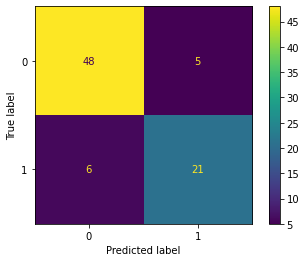

In [ ]:
 from sklearn.metrics import  ConfusionMatrixDisplay
 cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
 cmd.plot()
 plt.show()

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_test)

0.8076923076923077

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_test)

0.7777777777777778

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_test)

0.7924528301886792

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, pred_test)

0.65625

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_test)

4.749131729139607

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()

In [ ]:
nbclassifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
nbpred_train = nbclassifier.predict(x_train)

In [ ]:
nbpred_test = nbclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, nbpred_train)
test_accuracy = accuracy_score(y_test, nbpred_test)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)

Training Accuracy :  0.896875
Testing Accuracy :  0.8875


# **k nearest neighbours**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drug200.csv')

In [ ]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].map({'F': 0 , 'M' : 1}).astype(int)


In [ ]:
df['BP'] = df['BP'].map({'LOW': 0 , 'NORMAL' : 1 ,'HIGH' : 2 }).astype(int)

In [ ]:
df['Cholesterol'] = df['Cholesterol'].map({ 'NORMAL' : 0 ,'HIGH' : 1 }).astype(int)

In [ ]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


In [ ]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x

array([[23.   ,  0.   ,  2.   ,  1.   , 25.355],
       [47.   ,  1.   ,  0.   ,  1.   , 13.093],
       [47.   ,  1.   ,  0.   ,  1.   , 10.114],
       [28.   ,  0.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  0.   ,  0.   ,  1.   , 18.043],
       [22.   ,  0.   ,  1.   ,  1.   ,  8.607],
       [49.   ,  0.   ,  1.   ,  1.   , 16.275],
       [41.   ,  1.   ,  0.   ,  1.   , 11.037],
       [60.   ,  1.   ,  1.   ,  1.   , 15.171],
       [43.   ,  1.   ,  0.   ,  0.   , 19.368],
       [47.   ,  0.   ,  0.   ,  1.   , 11.767],
       [34.   ,  0.   ,  2.   ,  0.   , 19.199],
       [43.   ,  1.   ,  0.   ,  1.   , 15.376],
       [74.   ,  0.   ,  0.   ,  1.   , 20.942],
       [50.   ,  0.   ,  1.   ,  1.   , 12.703],
       [16.   ,  0.   ,  2.   ,  0.   , 15.516],
       [69.   ,  1.   ,  0.   ,  0.   , 11.455],
       [43.   ,  1.   ,  2.   ,  1.   , 13.972],
       [23.   ,  1.   ,  0.   ,  1.   ,  7.298],
       [32.   ,  0.   ,  2.   ,  0.   , 25.974],
       [57.   ,  1. 

In [ ]:
y = df[['Drug']].values
y

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugB'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugY'],
       ['drugB'],
       ['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugA'],
       ['drugC'],
       ['drugY'],
       ['drugY'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugY'],
       ['drugB'],
       ['d

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=3)
kn_classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_train = kn_classifier.predict(x_train)

In [ ]:
y_pred_test = kn_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.83125

In [ ]:
accuracy_score(y_test,y_pred_test)

0.825

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test,labels=kn_classifier.classes_)

In [ ]:
cm

array([[ 2,  0,  1,  0,  0],
       [ 0,  2,  0,  2,  0],
       [ 2,  1,  1,  0,  0],
       [ 0,  1,  0,  6,  0],
       [ 0,  0,  0,  0, 22]])

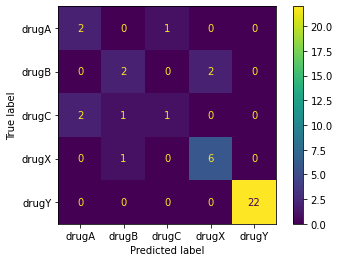

In [ ]:
 from sklearn.metrics import  ConfusionMatrixDisplay
 cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=kn_classifier.classes_)
 cmd.plot()
 plt.show()

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
acc_train = []
acc_test = []
for i in range(1,16) :
  kn_classifier = KNeighborsClassifier(n_neighbors=i)
  kn_classifier.fit(x_train,y_train)
  y_pred_train = kn_classifier.predict(x_train)
  y_pred_test = kn_classifier.predict(x_test)
  acc_train.append(accuracy_score(y_train,y_pred_train))
  acc_test.append(accuracy_score(y_test,y_pred_test))

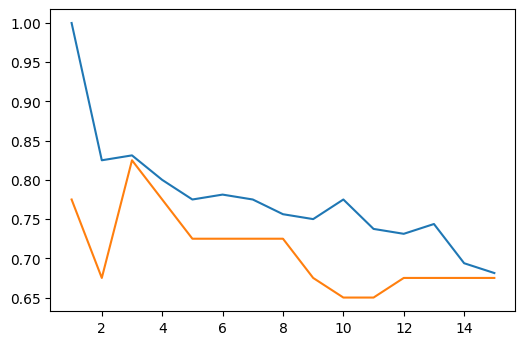

In [ ]:
X = list(range(1,16))
plt.figure(dpi=100)
plt.plot(X,acc_train,label='training accuracy')
plt.plot(X,acc_test,label='test accuracy')

# **decision tree**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/trainn.csv')
testt_data = pd.read_csv('/content/testt.csv')

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
testt_data.shape

(28000, 784)

In [ ]:
x = df.drop(labels='label',axis=1).values

In [ ]:
y = df[['label']].values

In [ ]:
y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [ ]:
y.shape

(42000, 1)

In [ ]:
print(len(x[0]))
print(x[0].shape)

784
(784,)


In [ ]:
np.set_printoptions(linewidth=700)

In [ ]:
x[0].reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 248

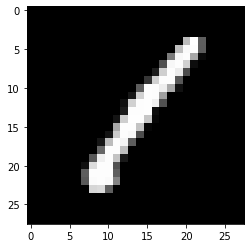

In [ ]:
plt.imshow(x[0].reshape([28,28]),cmap='gray')

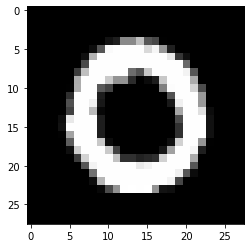

In [ ]:
plt.imshow(x[1].reshape([28,28]),cmap='gray')

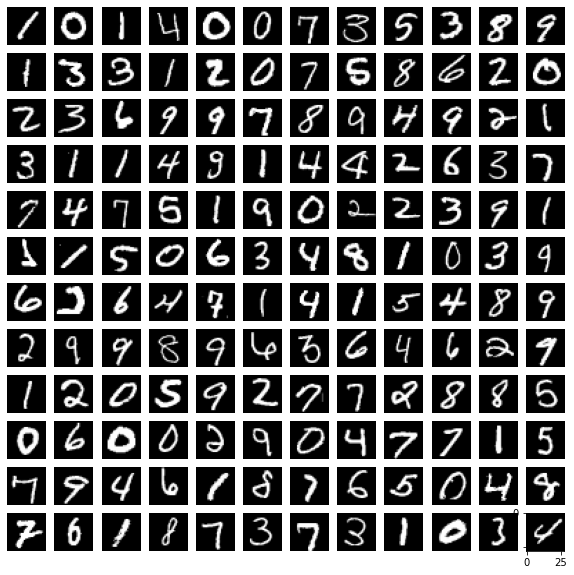

In [ ]:
plt.figure(figsize=(10,10))
for i in range(144):
  plt.axis('off')
  plt.subplot(12,12,1+i)
  plt.imshow(x[i].reshape([28,28]),cmap='gray')

In [ ]:
X = x/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=9)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31500, 784)
(10500, 784)
(31500, 1)
(10500, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [ ]:
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
pred_test = dt_classifier.predict(x_test)
pred_train = dt_classifier.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('training accuracy is :',accuracy_score(y_train,pred_train))
print('testing accuracy is :',accuracy_score(y_test,pred_test))

training accuracy is : 0.6913650793650794
testing accuracy is : 0.6823809523809524


In [ ]:
def recognize_digit(x):
  result = dt_classifier.predict(x.reshape([1,784]))
  plt.figure(figsize=(3,3))
  plt.imshow(x.reshape([28,28]),cmap='gray')
  print(result)

[1]


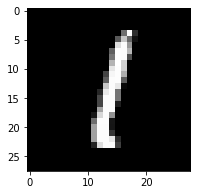

In [ ]:
recognize_digit(x_test[1])

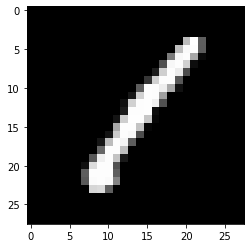

In [ ]:
plt.imshow(x[0].reshape([28,28]),cmap='gray')

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_test,labels=classes)
cm

array([[901,   0,  17,  26,   0,  13,  20,   5,  26,   1],
       [  0, 973,  70,   4,   0,  35,   8,  17,  97,   2],
       [ 18,  17, 752,  12,  10,  22,  57, 101,  46,   7],
       [ 42,   3, 169, 533,   8, 170,  16,  22,  75,  82],
       [ 17,   6,  56,   2, 467,  61,  49,  97,  28, 210],
       [ 72,  19,  43,  76,   9, 573,  42,  12,  79,  35],
       [ 22,   8,  74,   0,  34,  29, 773,  23,  40,  13],
       [ 11,  10,  81,   3,   5,  28,   4, 821,  18,  72],
       [  0,  93,  83,  24,  18,  38,  40,   5, 636,  93],
       [ 30,  17,  49,  27,  10,  62,  16, 107,  17, 736]])

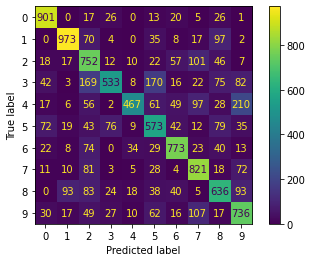

In [ ]:
 from sklearn.metrics import  ConfusionMatrixDisplay
 cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
 cmd.plot()
 plt.show()

# **SUPPORT VECTOR MACHINES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test (1).csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
avg_age = train_data['Age'].mean()
train_data['Age'].replace(np.nan,avg_age,inplace=True)

In [ ]:
train_data['Age'].isnull().sum()

0

In [ ]:
avg_age = test_data.Age.mean()
test_data.Age.replace(np.nan, avg_age, inplace = True)

In [ ]:
test_data['Age'].isnull().sum()

0

In [ ]:
avg_fare = test_data.Fare.mean()
test_data.Fare.replace(np.nan, avg_fare, inplace = True)

In [ ]:
freq_port = train_data.Embarked.mode()[0]
train_data.Embarked.replace(np.nan, freq_port, inplace = True)

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex']  = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [ ]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
train_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
dataset = [train_data,test_data]
for data in dataset :
      data.loc[data['Age']<=20,'Age'] = 0
      data.loc[(data['Age']>20) & (data['Age']<=40) , 'Age'] = 1
      data.loc[(data['Age']>40) & (data['Age']<= 60) ,'Age'] = 2
      data.loc[data['Age'] > 60, 'Age'] = 3

In [ ]:
for data in dataset:
    data.loc[data['Fare'] <= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15),'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 31),'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

In [ ]:
for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,1,1,0,3,1
2,3,1,3,1,1,0,0,0,0
3,4,1,1,1,1,1,0,3,0
4,5,0,3,0,1,0,0,1,0


In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,1,0,0,0,2
1,893,3,1,2,1,0,0,0
2,894,2,0,3,0,0,1,2
3,895,3,0,1,0,0,1,0
4,896,3,1,1,1,1,1,0


In [ ]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis =1).values
Y_train = train_data['Survived'].values
X_test = test_data.drop('PassengerId', axis = 1).values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(891, 7)
(891,)
(418, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(random_state = 5)
classifier.fit(x_train, y_train)

SVC(random_state=5)

In [ ]:
y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[102,   9],
       [ 19,  49]])

In [ ]:
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.8146067415730337
Testing Accuracy  :  0.8435754189944135


In [ ]:
classes = [0,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test,labels=classes)
cm

array([[102,   9],
       [ 19,  49]])

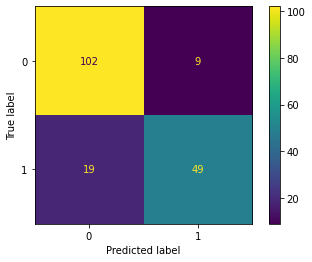

In [ ]:
 from sklearn.metrics import  ConfusionMatrixDisplay
 cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
 cmd.plot()
 plt.show()

# **Ensemble models for classification problems**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('trainn.csv')

In [ ]:
print(train_data.shape)

(42000, 785)


In [ ]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data.drop(['label'],axis=1).values
Y = train_data[['label']].values

In [ ]:
Y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

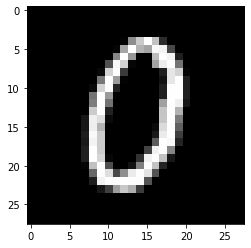

In [ ]:
plt.imshow(X[5].reshape(28,28), cmap = 'gray')

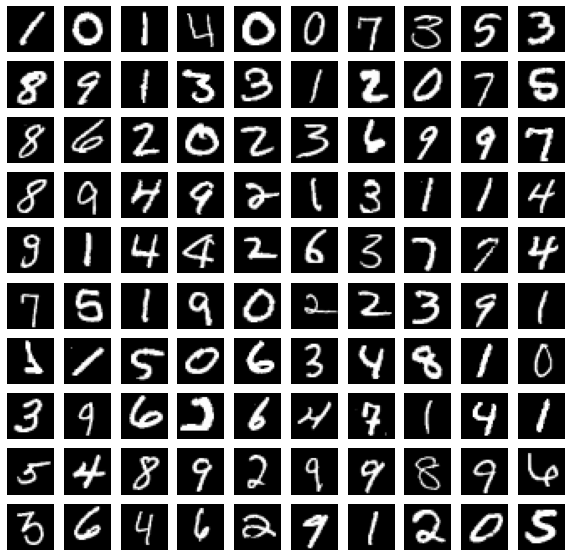

In [ ]:
plt.figure(figsize = (10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape([28,28]), cmap = 'gray')

In [ ]:
X = X/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(29400, 784)
(29400, 1)


DECISION TREE CLASSIFIER

DecisionTreeClassifier(

 class_weight=None, criterion='entropy', max_depth=8
   max_features=None, max_leaf_nodes=None,
   min_impurity_decrease=0.0, min_impurity_split=None,
   min_samples_leaf=1, min_samples_split=2,
   min_weight_fraction_leaf=0.0, presort=False,
   random_state=14, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=10,random_state=2)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=2)

In [ ]:
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('training accuracy :',accuracy_score(y_train,pred_train))
print()
print('testing accuracy :',accuracy_score(y_test,pred_test))

training accuracy : 0.9162244897959184

testing accuracy : 0.8428571428571429


ensemble models are divided based on homogenous , hetrogeneous.
A. HOMO(same models)
1.bagging : parallel with subsets of main dataset & aggregating all outputs(random forest)
2.boosting : sequential with subsets of main dataset & aggregating all outputs (xg boost, xg lite, adam boost)

B.hetro(diff models)
1.Stacking

*** RANDOM FOREST***

RandomForestClassifier(

bootstrap=True, class_weight=None, criterion='entropy',
  max_depth=10, max_features='auto', max_leaf_nodes=None,
  min_impurity_decrease=0.0, min_impurity_split=None,
  min_samples_leaf=1, min_samples_split=2,
  min_weight_fraction_leaf=0.0, n_estimators=10,
  n_jobs=None, oob_score=False, random_state=14,verbose=0,
  warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20 , max_depth = 10,random_state=2)
rf_classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=10, n_estimators=20, random_state=2)

In [ ]:
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('training accuracy :',accuracy_score(y_train,pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

training accuracy : 0.9675510204081633
Testing Accuracy  :  0.9344444444444444


**XGBOOST**
XGBClassifier(

base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=4, num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method='exact', use_label_encoder=True, validate_parameters=1, verbosity=None)

In [ ]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 10 ,max_depth = 5)
xg_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=5, n_estimators=10, objective='multi:softprob')

In [ ]:
pred_train = xg_classifier.predict(x_train)
pred_test = xg_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accurcay : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accurcay :  0.9181972789115647
Testing Accuracy  :  0.8958730158730158


**LIGHT GBM**
LGBMClassifier(

boosting_type='gbdt', class_weight=None, colsample_bytree=1.0, importance_type='split', learning_rate=0.1, max_depth=-1, min_child_samples=20, min_child_weight=0.001,min_split_gain=0.0, n_estimators=5, n_jobs=-1, num_leaves=31, objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators=10)
lg_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(n_estimators=10)

In [ ]:
pred_train = lg_classifier.predict(x_train)
pred_test = lg_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accurcay : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accurcay :  0.9403061224489796
Testing Accuracy  :  0.9201587301587302


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier =  KNeighborsClassifier(n_neighbors=4,metric = 'minkowski',p=2)
kn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
pred_train = kn_classifier.predict(x_train)
pred_test = kn_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accurcay : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accurcay :  0.978265306122449
Testing Accuracy  :  0.9633333333333334


# **STACKING ENSEMBLE (VOTING CLASSFIER)**

In [ ]:
from sklearn.ensemble import VotingClassifier 
vt_classifier = VotingClassifier(estimators = [
                                               ('dt',dt_classifier),
                                               ('rf',rf_classifier),
                                               ('xg',xg_classifier),
                                               ('lg',lg_classifier),
                                               ('kn',kn_classifier)   ],
                                               voting = 'hard'  
                                )

In [ ]:
vt_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=2)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=20,
                                                     random_state=2)),
                             ('xg',
                              XGBClassifier(max_depth=5, n_estimators=10,
                                            objective='multi:softprob')),
                             ('lg', LGBMClassifier(n_estimators=10)),
                             ('kn', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
pred_train = vt_classifier.predict(x_train)
pred_test = vt_classifier.predict(x_test)


In [ ]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9688775510204082
Testing Accuracy  :  0.9437301587301588


# **k means clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = df.iloc[:10, 3:].values
x

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [ ]:
km = KMeans(n_clusters = 3, random_state = 5)
y_kmeans = km.fit_predict(x)
y_kmeans

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
km.inertia_

309.1666666666667

In [ ]:
x[y_kmeans == 0]

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72]])

In [ ]:
km.cluster_centers_

array([[17.        , 80.        ],
       [17.66666667,  5.        ],
       [16.        , 39.5       ]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,4):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(x)
    wcss.append(km.inertia_)

In [ ]:
plt.figure(dpi = 200)
sns.scatterplot(x[y_kmeans == 0,0], x[y_kmeans == 0,1], label = 'Cluster1')
sns.scatterplot(x[y_kmeans == 1,0], x[y_kmeans == 1,1], label = 'Cluster2')
sns.scatterplot(x[y_kmeans == 2,0], x[y_kmeans == 2,1], label = 'Cluster3')
sns.scatterplot(x[y_kmeans == 3,0], x[y_kmeans == 3,1], label = 'Cluster4')
sns.scatterplot(x[y_kmeans == 4,0], x[y_kmeans == 4,1], label = 'Cluster5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,4):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(x)
    wcss.append(km.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

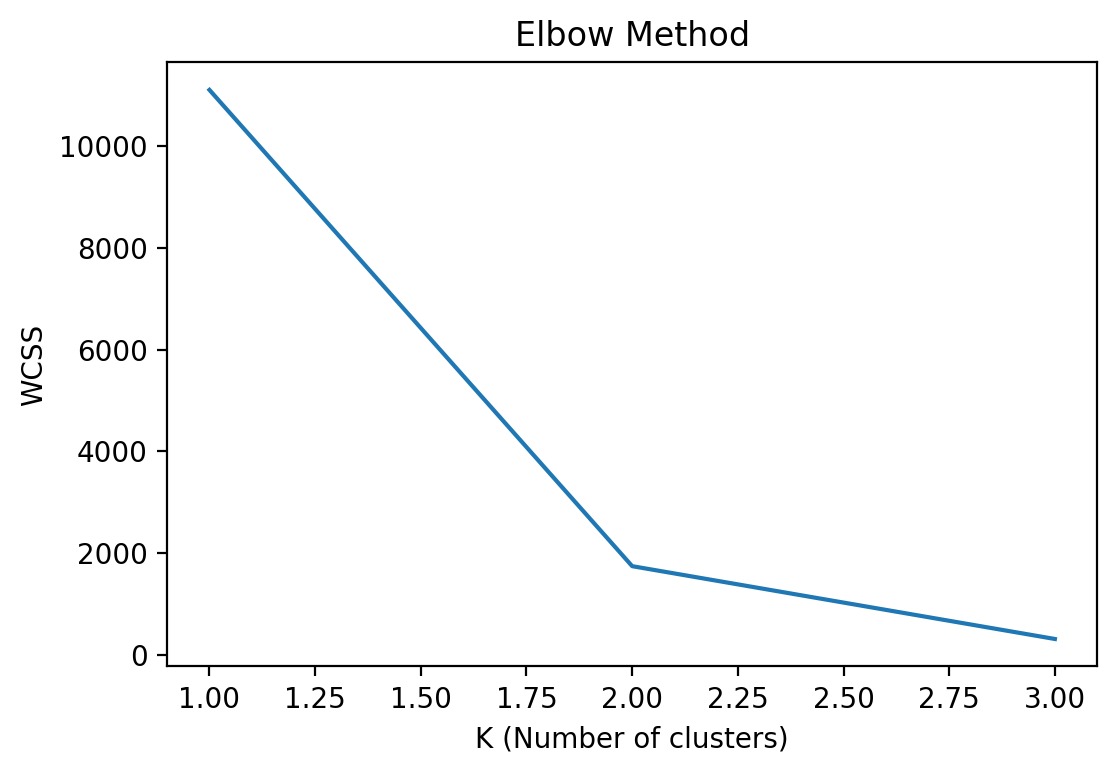

In [ ]:
plt.figure(dpi = 200)
sns.lineplot(range(1,4), wcss)
plt.title('Elbow Method')
plt.xlabel('K (Number of clusters)')
plt.ylabel('WCSS')

# **example**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame({'f1':[2,3,4,10,11,12,20,25,30]})

In [ ]:
df.head()

,f1
0,2
1,3
2,4
3,10
4,11


In [ ]:
x = df.iloc[:,:].values

In [ ]:
x

array([[ 2],
       [ 3],
       [ 4],
       [10],
       [11],
       [12],
       [20],
       [25],
       [30]])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state = 5)
y_kmeans = km.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [ ]:
plt.figure(dpi = 200)
sns.scatterplot(x[y_kmeans == 0],  label = 'Cluster1')
sns.scatterplot(x[y_kmeans == 1], label = 'Cluster2')
sns.scatterplot(x[y_kmeans == 2], label = 'Cluster3')
sns.scatterplot(x[y_kmeans == 3],  label = 'Cluster4')
sns.scatterplot(x[y_kmeans == 4],  label = 'Cluster5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(x)
    wcss.append(km.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

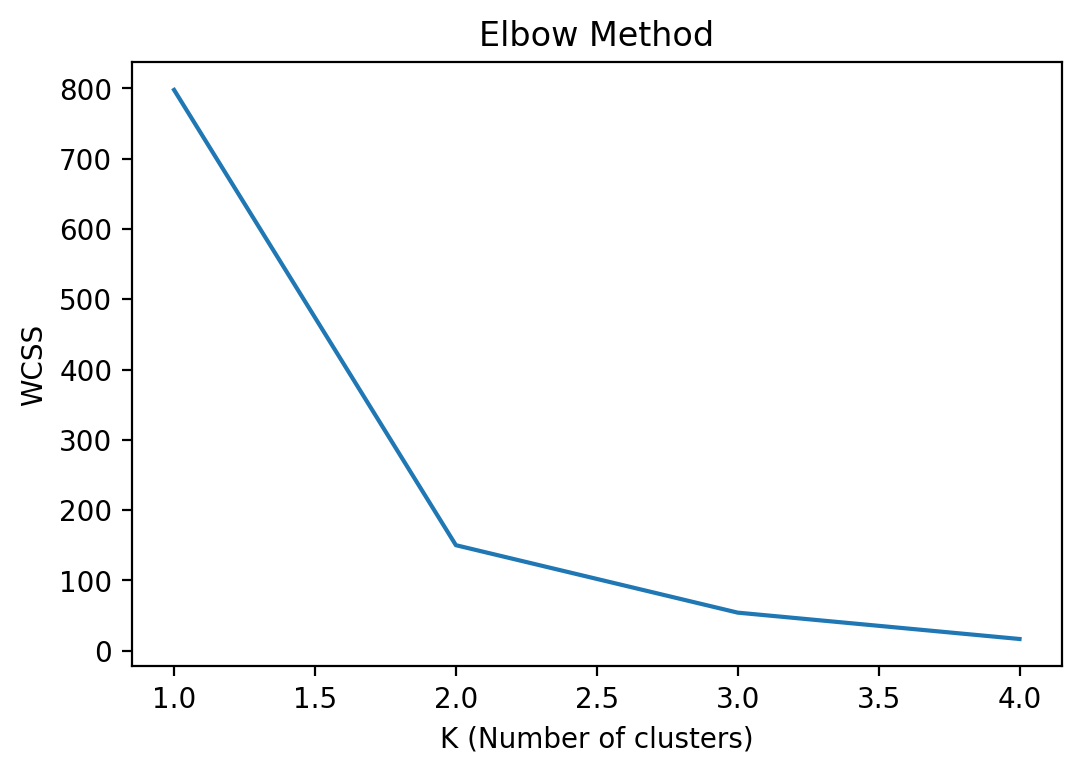

In [ ]:
plt.figure(dpi = 200)
sns.lineplot(range(1,5), wcss)
plt.title('Elbow Method')
plt.xlabel('K (Number of clusters)')
plt.ylabel('WCSS')

In [ ]:
km.inertia_

150.0

# **polynomial regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Position_Salaries.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,Head,10,1000000


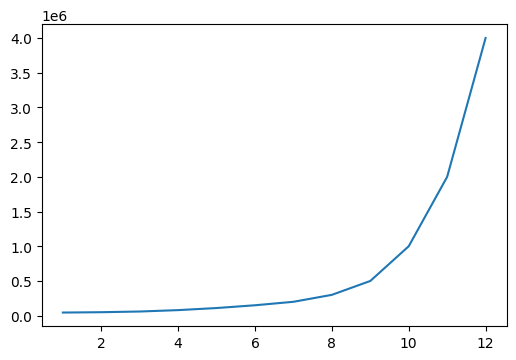

In [ ]:
plt.figure(dpi=100)
plt.plot(df['Level'],df['Salary'])

In [ ]:
x = df[['Level']].values
y = df[['Salary']].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [ ]:
print(x.shape)

(12, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.score(x,y)

0.5613579410973761

In [ ]:
pred = reg.predict(x)

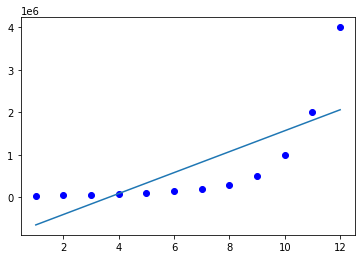

In [ ]:
plt.plot(x,y,'ob')
plt.plot(x,reg.predict(x))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly2 = poly.fit_transform(x)
x_poly2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.]])

In [ ]:
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2,y)

LinearRegression()

In [ ]:
poly_reg2.score(x_poly2,y)

0.8744625771933064

In [ ]:
pred2 = poly_reg2.predict(x_poly2)

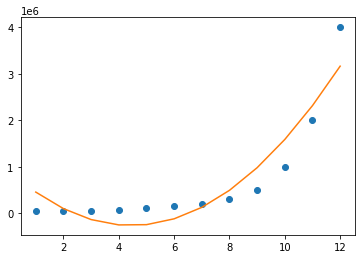

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,pred2)

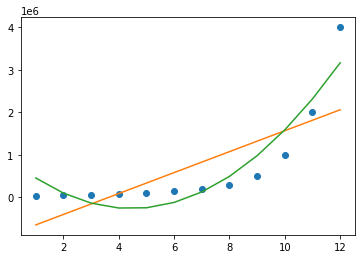

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,pred)
plt.plot(x,pred2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly3 = poly.fit_transform(x)
x_poly3

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03]])

In [ ]:
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3,y)

LinearRegression()

In [ ]:
poly_reg3.score(x_poly3,y)

0.9775886789767279

In [ ]:
pred3 = poly_reg3.predict(x_poly3)

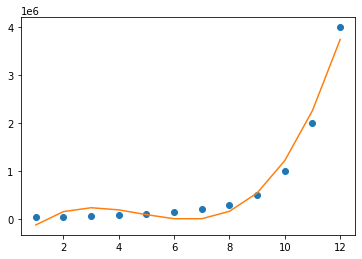

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,pred3)

In [ ]:
poly_reg3.coef_

array([[      0.        ,  700183.70518363, -168310.85581084,
          11715.22921523]])